# images.imfilter

The images.imfilter IRAF package provides an assortment of image filtering and convolution tasks.

<a id='notes'></a>

## Notes

**For questions or comments please see** [our github page](https://github.com/spacetelescope/stak).  **We encourage and appreciate user feedback.**

Python replacements for the images.imfilter tasks can be found in the Astropy and Scipy packages.  Astropy convolution offers two convolution options, ``convolve()`` is better for small kernels, and ``convolve_fft()`` is better for larger kernels, please see the [Astropy convolution doc page](http://docs.astropy.org/en/stable/convolution/) and [Astropy Convolution How to](http://docs.astropy.org/en/stable/convolution/using.html) for more details.  For this notebook, we will use ``convolve``. Check out the list of kernels and filters avaialble for [Astropy](http://docs.astropy.org/en/stable/convolution/#module-astropy.convolution), and [Scipy](http://docs.scipy.org/doc/scipy/reference/ndimage.html)

Although ``astropy.convolution`` is built on ``scipy``, it offers several advantages:
* can handle NaN values
* improved options for boundaries
* provided built in kernels

So when possible, we will be using ``astropy.convolution`` functions in this notebook.

You can select from the following boundary rules in ``astropy.convolution``:
* none
* fill
* wrap
* extend

You can select from the following boundary rules in ``scipy.ndimage.convolution``:
* reflect
* constant
* nearest
* mirror
* wrap


Below we change the matplotlib colormap to ``viridis``.  This is temporarily changing the colormap setting in the matplotlib rc file.


Contents:

* [boxcar](#boxcar)
* [covolve](#convolve)
* [gauss](#gauss)
* [laplace](#laplace)
* [median-rmedian](#median-rmedian)
* [mode-rmode](#mode-rmode)

In [1]:
# Temporarily change default colormap to viridis
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'viridis'

<br>

<br>

<a id='boxcar'></a>

## boxcar

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The boxcar convolution does a boxcar smoothing with a given box size, and applies this running average to an array.  Here we show a 2-D example using ``Box2DKernel``, which is convinient for square box sizes.

In [6]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits
from astropy.convolution import convolve as ap_convolve
from astropy.convolution import Box2DKernel

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# grab subsection of fits images
test_data = '/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# setup our kernel
box_kernel = Box2DKernel(3)
# perform convolution
result = ap_convolve(my_arr, box_kernel, normalize_kernel=True)

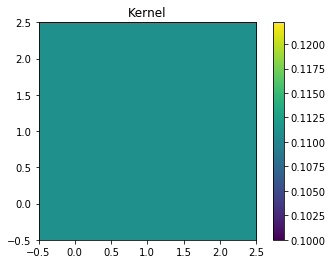

In [8]:
plt.imshow(box_kernel, interpolation='none', origin='lower')
plt.title('Kernel')
plt.colorbar()
plt.show()

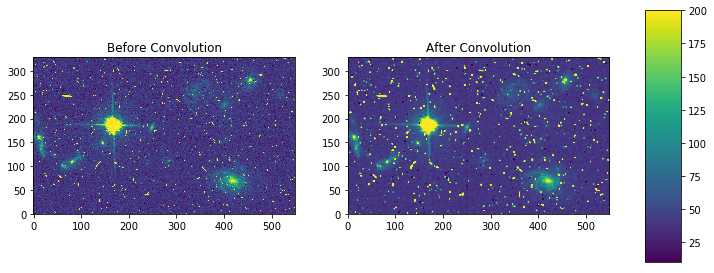

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(result,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

<br>

<a id='convolve'></a>

## convolve

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The convolve task allows you to convolve your data array with a kernel of your own creation.  Here we show a simple example of a rectangular kernel applied to a 10 by 10 array using the ``astropy.convolution.convolve`` function

In [13]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits
from astropy.convolution import convolve as ap_convolve

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# grab subsection of fits images
test_data = '/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[840:950,2350:2500]

# add nan's to test array
my_arr[40:50,60:70] = np.nan
my_arr[70:73,110:113] = np.nan

# setup our custom kernel
my_kernel = [[0,1,0],[1,0,1],[0,1,0],[1,0,1],[0,1,0]]
# perform convolution
result = ap_convolve(my_arr, my_kernel, normalize_kernel=True, boundary='wrap')

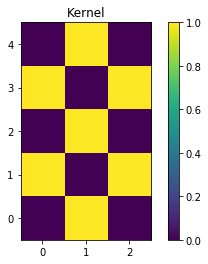

In [15]:
plt.imshow(my_kernel, interpolation='none', origin='lower')
plt.title('Kernel')
plt.colorbar()
plt.show()

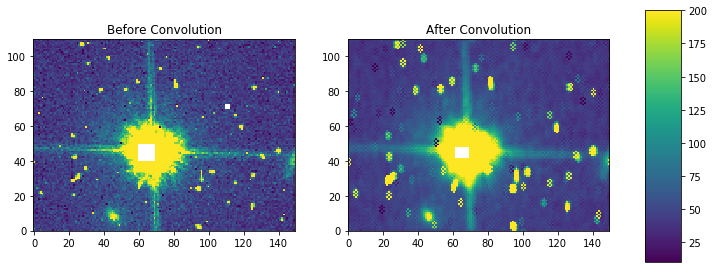

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(result,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

Here is an example using masking with ``scipy.convolve``

In [17]:
# Standard Imports
import numpy as np
from scipy.ndimage import convolve as sp_convolve

# Astronomy Specific Imports
from astropy.io import fits

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# grab subsection of fits images
test_data = '/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# setup our custom kernel
my_kernel = np.array([[0,1,0],[1,0,1],[0,1,0],[1,0,1],[0,1,0]]) * (1/7.0)
# perform convolution
result = sp_convolve(my_arr, my_kernel, mode='wrap')

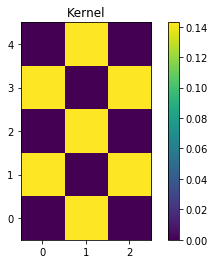

In [19]:
plt.imshow(my_kernel, interpolation='none', origin='lower')
plt.title('Kernel')
plt.colorbar()
plt.show()

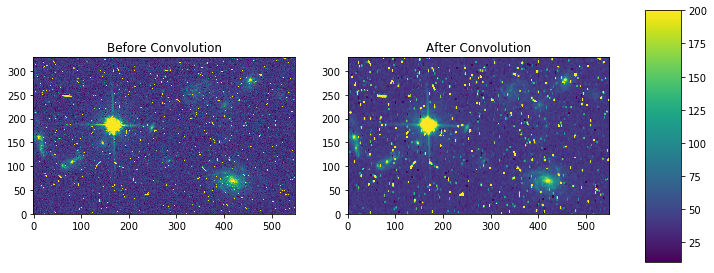

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(result,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

<br>

<a id='gauss'></a>

## gauss

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The gaussian kernel convolution applies a gaussian function convolution to your data array.  The [Gaussian2DKernel](http://docs.astropy.org/en/stable/api/astropy.convolution.Gaussian2DKernel.html#astropy.convolution.Gaussian2DKernel) size is defined slightly differently from the IRAF version.

In [21]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits
from astropy.convolution import convolve as ap_convolve
from astropy.convolution import Gaussian2DKernel

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# grab subsection of fits images
test_data = '/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# setup our kernel, with 6 sigma and a 3 in x by 5 in y size
gauss_kernel = Gaussian2DKernel(6, x_size=5, y_size=7)
# perform convolution
result = ap_convolve(my_arr, gauss_kernel, normalize_kernel=True)

gauss_kernel

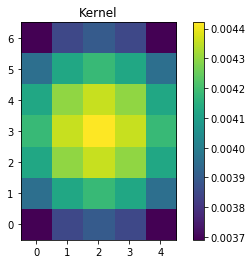

In [23]:
plt.imshow(gauss_kernel, interpolation='none', origin='lower')
plt.title('Kernel')
plt.colorbar()
plt.show()

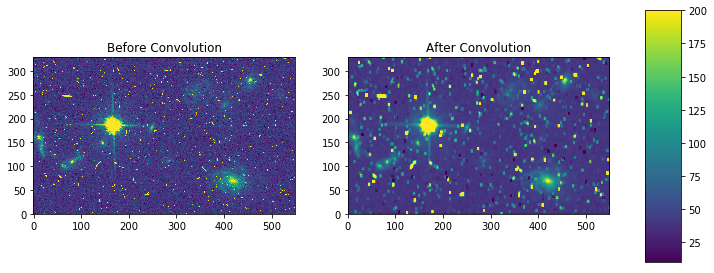

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(result,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

<br>

<a id='laplace'></a>

## laplace

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The laplace task runs a image convolution using a laplacian filter with a subset of footprints.  For the `scipy.ndimage.filter.laplace` function we will be using, you can feed any footprint in as an array to create your kernel.

In [25]:
# Standard Imports
import numpy as np
from scipy.ndimage import convolve as sp_convolve
from scipy.ndimage import laplace

# Astronomy Specific Imports
from astropy.io import fits

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# grab subsection of fits images
test_data = '/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# setup our laplace kernel with a target footprint (diagonals in IRAF)
footprint = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
laplace_kernel = laplace(footprint)
# perform scipy convolution
result = sp_convolve(my_arr, laplace_kernel)

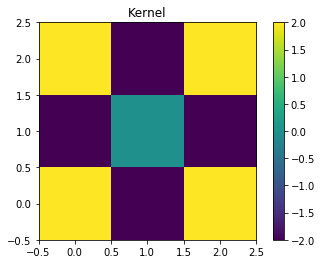

In [27]:
plt.imshow(laplace_kernel, interpolation='none', origin='lower')
plt.title('Kernel')
plt.colorbar()
plt.show()

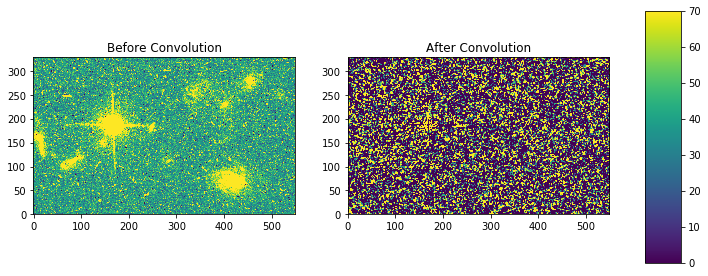

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2)
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=0, vmax=70)
axes[0].set_title('Before Convolution')
a = axes[1].imshow(result,interpolation='none', origin='lower',vmin=0, vmax=70)
axes[1].set_title('After Convolution')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

<br>

<a id='median-rmedian'></a>

## median-rmedian

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Apply a median filter to your data array, and save the smoothed image back out to a FITS file.  We will use the ``scipy.ndimage.filters.median_filter`` function.

In [29]:
# Standard Imports
import numpy as np
from scipy.ndimage.filters import median_filter

# Astronomy Specific Imports
from astropy.io import fits

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# create test array
test_data = '/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits'
out_file = 'median_out.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# apply median filter
filtered = median_filter(my_arr,size=(3,4))

In [31]:
# save smoothed image to a new FITS file
hdu = fits.PrimaryHDU(filtered)
hdu.writeto(out_file, overwrite=True)

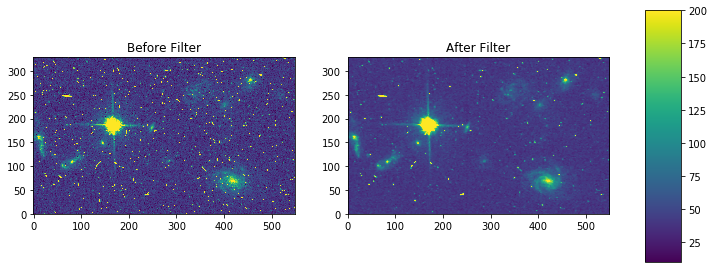

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Filter')
a = axes[1].imshow(filtered,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Filter')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

For a ring median filter we can supply a more specific footprint to the ``median_filter`` function.  You can easily generate this footprint using the ``astroimtools`` library

In [33]:
# Standard Imports
import numpy as np
from scipy.ndimage.filters import median_filter

# Astronomy Specific Imports
from astropy.io import fits
from astroimtools import circular_annulus_footprint

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

#depreciation warning, is fixed already in the dev version, not sure when this is getting pushed

In [34]:
# create test array
test_data = '/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# create annulus filter
fp = circular_annulus_footprint(10, 12)
# apply median filter
filtered = median_filter(my_arr, footprint=fp)

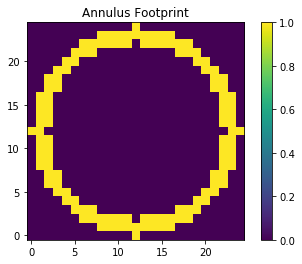

In [35]:
plt.imshow(fp, interpolation='none', origin='lower')
plt.title('Annulus Footprint')
plt.colorbar()
plt.show()

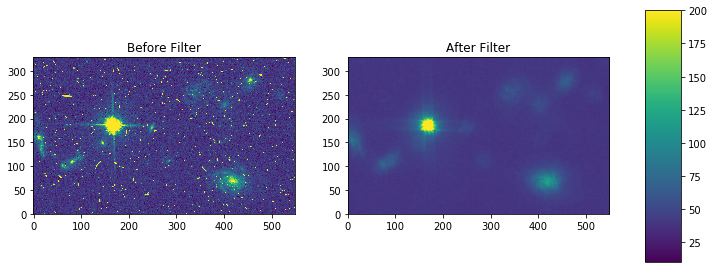

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Filter')
a = axes[1].imshow(filtered,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Filter')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

<br>

<a id='mode-rmode'></a>

##  mode-rmode

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The mode calculation equation used in the mode and rmode IRAF tasks (3.0\*median - 2.0\*mean) can be recreated using the ``scipy.ndimage.generic_filter`` function. The equation was used as an approximation for a mode calculation.

In [37]:
# Standard Imports
import numpy as np
from scipy.ndimage import generic_filter

# Astronomy Specific Imports
from astropy.io import fits

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def mode_func(in_arr):
    f = 3.0*np.median(in_arr) - 2.0*np.mean(in_arr)
    return f

For a box footprint:

In [39]:
# create test array
test_data = '/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# apply mode filter
filtered = generic_filter(my_arr,mode_func,size=5)

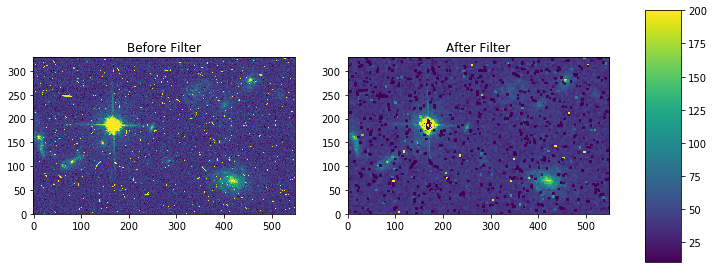

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Filter')
a = axes[1].imshow(filtered,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Filter')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

For a ring footprint:

In [41]:
# Standard Imports
import numpy as np
from scipy.ndimage import generic_filter

# Astronomy Specific Imports
from astropy.io import fits
from astroimtools import circular_annulus_footprint

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# create test array
test_data = '/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits'
sci1 = fits.getdata(test_data,ext=1)
my_arr = sci1[700:1030,2250:2800]

# create annulus filter
fp = circular_annulus_footprint(5, 9)
# apply mode filter
filtered = generic_filter(my_arr,mode_func,footprint=fp)

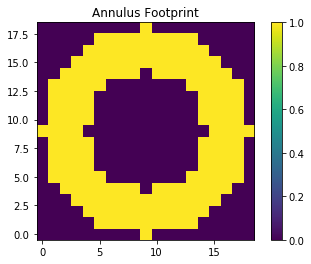

In [43]:
plt.imshow(fp, interpolation='none', origin='lower')
plt.title('Annulus Footprint')
plt.colorbar()
plt.show()

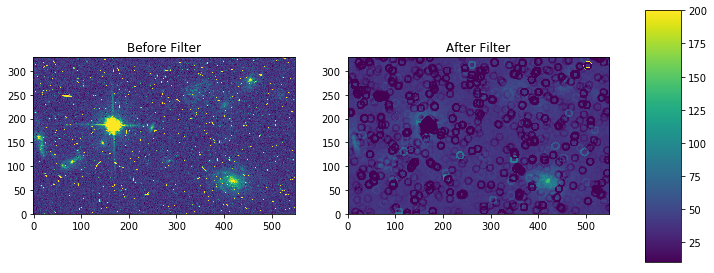

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pmin,pmax = 10, 200
a = axes[0].imshow(my_arr,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[0].set_title('Before Filter')
a = axes[1].imshow(filtered,interpolation='none', origin='lower',vmin=pmin, vmax=pmax)
axes[1].set_title('After Filter')

fig.subplots_adjust(right = 0.8,left=0)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(a, cax=cbar_ax)
fig.set_size_inches(10,5)
plt.show()

<br>

<br>

## Not Replacing

* runmed - see **images.imutil.imsum**
* fmode - see [images.imfilter.mode](#mode-rmode)
* fmedian - see [images.imfilter.median](#median-rmedian)
* gradient - **may** replace in future